In [26]:
import keras
import numpy as np
import pandas as pd
import cv2 
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

In [27]:
!pip install PyDrive

In [28]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [29]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [30]:
download = drive.CreateFile({'id': '1jqr4Y0JMTi4DaKaQuNiS8ufE0_cyK6RI'})
download.GetContentFile('train.csv')
train = pd.read_csv('train.csv')

In [31]:
download = drive.CreateFile({'id': '1RbDULDdvQ_l8yRjqumh0f-kZi5TpYfuq'})
download.GetContentFile('test.csv')
test = pd.read_csv('test.csv')

In [32]:
display(train.info())

display(test.info())

display(train.head(n = 2))
display(test.head(n = 2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


None

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180


In [33]:
train_Y = train['label']
test_Y = test['label']
train_X = train.drop(['label'],axis = 1)
test_X = test.drop(['label'],axis = 1)

In [34]:
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32')/255

In [35]:
display(train_Y)

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [36]:
train_X = train_X.values.reshape(27455,784)
test_X = test_X.values.reshape(7172,784)
train_Y = keras.utils.to_categorical(train_Y,26)
test_Y = keras.utils.to_categorical(test_Y,26)

In [37]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=26,activation="softmax"))

In [38]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_X,train_Y,batch_size=32,epochs=100,verbose=1)

Epoch 1/100
858/858 [==============================] - 2s 2ms/step - loss: 3.2147 - accuracy: 0.0681
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 3.1256 - accuracy: 0.1539
Epoch 3/100
858/858 [==============================] - 2s 2ms/step - loss: 3.0577 - accuracy: 0.1943
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 2.9834 - accuracy: 0.2105
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 2.8875 - accuracy: 0.2395
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 2.7715 - accuracy: 0.2653
Epoch 7/100
858/858 [==============================] - 2s 2ms/step - loss: 2.6350 - accuracy: 0.2890
Epoch 8/100
858/858 [==============================] - 2s 2ms/step - loss: 2.4878 - accuracy: 0.3191
Epoch 9/100
858/858 [==============================] - 2s 2ms/step - loss: 2.3402 - accuracy: 0.3456
Epoch 10/100
858/858 [==============================] - 2s 2ms/step - loss: 2.1980 - accura

In [39]:
accuracy = model.evaluate(x=test_X,y=test_Y,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 [==============================] - 0s 1ms/step - loss: 1.2238 - accuracy: 0.7122
Accuracy:  0.7122141718864441


In [40]:
img = test_X[1]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  5


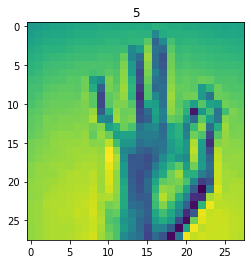

In [41]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [43]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=26,activation="softmax"))

In [44]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_X,train_Y,batch_size=32,epochs=100,verbose=1)


Epoch 1/100
858/858 [==============================] - 2s 3ms/step - loss: 3.2078 - accuracy: 0.0423
Epoch 2/100
858/858 [==============================] - 2s 3ms/step - loss: 3.1544 - accuracy: 0.0742
Epoch 3/100
858/858 [==============================] - 2s 2ms/step - loss: 3.0946 - accuracy: 0.1327
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 3.0044 - accuracy: 0.2012
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 2.8575 - accuracy: 0.2255
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 2.6492 - accuracy: 0.2473
Epoch 7/100
858/858 [==============================] - 2s 2ms/step - loss: 2.4304 - accuracy: 0.2854
Epoch 8/100
858/858 [==============================] - 2s 2ms/step - loss: 2.2444 - accuracy: 0.3216
Epoch 9/100
858/858 [==============================] - 2s 2ms/step - loss: 2.0934 - accuracy: 0.3515
Epoch 10/100
858/858 [==============================] - 2s 2ms/step - loss: 1.9615 - accura

In [45]:
accuracy = model.evaluate(x=test_X,y=test_Y,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 [==============================] - 0s 1ms/step - loss: 1.9209 - accuracy: 0.6888
Accuracy:  0.6887897253036499


In [46]:
img = test_X[1]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  5


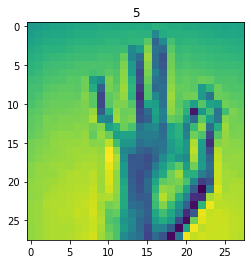

In [47]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [48]:
model.save_weights('model_weights.h5')
weights_file = drive.CreateFile({'title' : 'model_weights.h5'})
weights_file.SetContentFile('model_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '10uMiTLKI91-5Gk8J7y7Ziqb_-dLIv1e8'})

In [49]:
model.save('model.h5')
weights_file = drive.CreateFile({'title' : 'model.h5'})
weights_file.SetContentFile('model.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1UlfLpIWfu8kzPS4VHXQOlrRf6tnfhHiC'})

In [50]:
!pip install h5py pyyaml

**CNN**

In [51]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [52]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [56]:
classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
275/275 [==============================] - 10s 38ms/step - loss: 1.6777 - accuracy: 0.6137
Epoch 2/50
275/275 [==============================] - 10s 38ms/step - loss: 0.1580 - accuracy: 0.9591
Epoch 3/50
275/275 [==============================] - 10s 38ms/step - loss: 0.0449 - accuracy: 0.9932
Epoch 4/50
275/275 [==============================] - 11s 38ms/step - loss: 0.0236 - accuracy: 0.9967
Epoch 5/50
275/275 [==============================] - 10s 38ms/step - loss: 0.0206 - accuracy: 0.9964
Epoch 6/50
275/275 [==============================] - 11s 38ms/step - loss: 0.0084 - accuracy: 0.9991
Epoch 7/50
275/275 [==============================] - 10s 38ms/step - loss: 0.0096 - accuracy: 0.9980
Epoch 8/50
275/275 [==============================] - 10s 38ms/step - loss: 0.0055 - accuracy: 0.9992
Epoch 9/50
275/275 [==============================] - 10s 38ms/step - loss: 0.0538 - accuracy: 0.9834
Epoch 10/50
275/275 [==============================] - 10s 37ms/step - loss: 0.003

In [58]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 [==============================] - 2s 8ms/step - loss: 0.9221 - accuracy: 0.8723
Accuracy:  0.8722810745239258


In [59]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
dense_14 (Dense)             (None, 3, 3, 128)         2176      
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 26)               

In [60]:
from keras.utils.vis_utils import plot_model

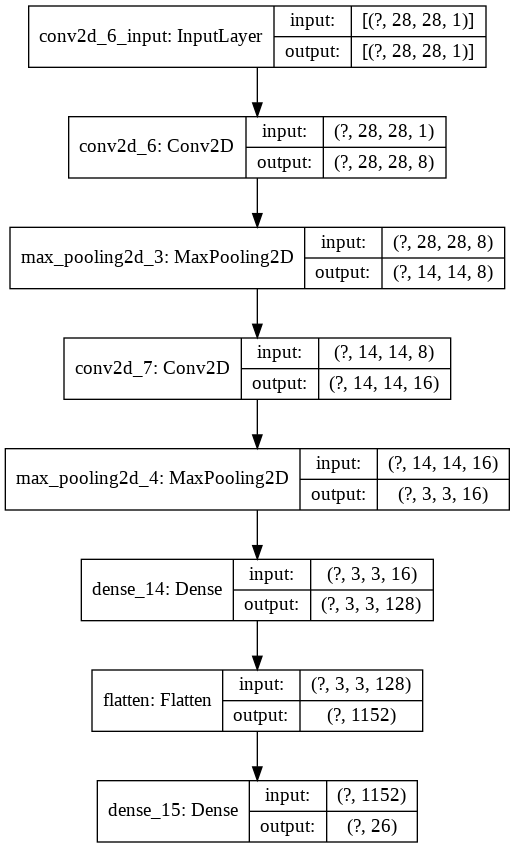

In [61]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

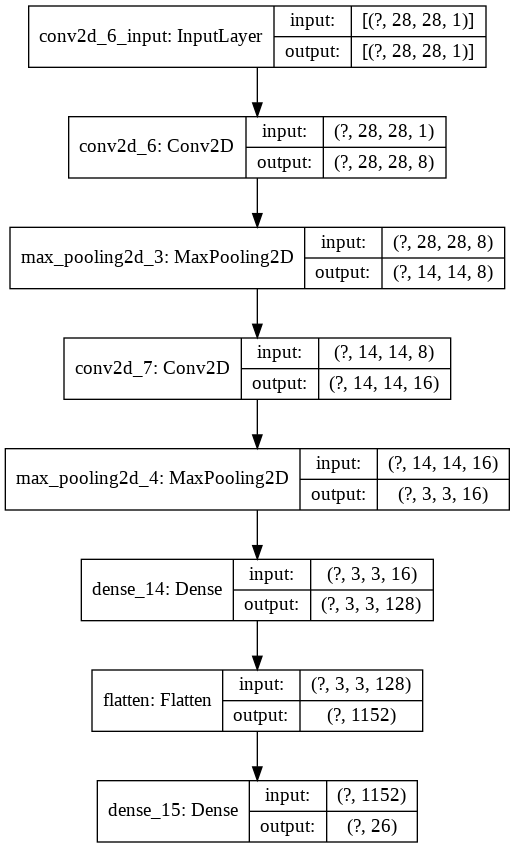

In [62]:
plot_model(classifier, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [63]:
classifier.save('CNNmodel.h5')
weights_file = drive.CreateFile({'title' : 'CNNmodel.h5'})
weights_file.SetContentFile('CNNmodel.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1dDe5JUW64hnTDq-iptpvw5t4cyN9rlt0'})